# Assignment 9 
by [Jay Nakum](https://jaynakum.github.io) [20BCP304D]

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('./datasets/marketing_campaign.csv', sep='\t')
data

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Education'] = en.fit_transform(data['Education'])
data['Marital_Status'] = en.fit_transform(data['Marital_Status'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data

In [ ]:
data.isna().sum().sort_values(ascending=False)

In [104]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

In [ ]:
data.isna().any()

In [ ]:
data.shape

In [107]:
data = data.drop('Dt_Customer', axis=1)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data = pd.DataFrame(sc.transform(data), columns=data.columns)

In [109]:
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
pip = Pipeline([('Constant', DropConstantFeatures(tol=0.98)), ('Duplicate', DropDuplicateFeatures()), ('Correlated', SmartCorrelatedSelection())])

In [ ]:
data = pip.fit_transform(data)
data.shape

In [ ]:
data.head()

In [112]:
X = data.drop('ID', axis=1)

In [113]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4).fit(X)
dis, indices = nn.kneighbors(n_neighbors=4)

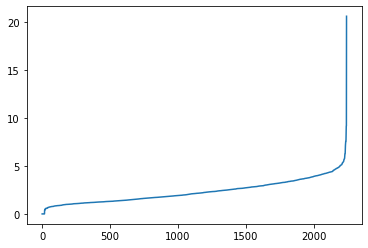

In [114]:
distance = np.sort(dis, axis=0)
distance = distance[:,1]
plt.plot(distance)

In [115]:
model = DBSCAN(eps=5, min_samples=24)
Y = model.fit_predict(X)
np.unique(Y)

array([-1,  0], dtype=int64)

In [116]:
from sklearn.metrics import silhouette_score
silhouette_score(X, Y)

0.3570857982806897